In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout


In [3]:
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load(
    name = 'kmnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Samara\tensorflow_datasets\kmnist\3.0.1.incomplete4TRNX6\kmnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Samara\tensorflow_datasets\kmnist\3.0.1.incomplete4TRNX6\kmnist-test.tfrecord*...:   0%|   …

Dataset kmnist downloaded and prepared to C:\Users\Samara\tensorflow_datasets\kmnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
x_train = x_train.squeeze()
x_test = x_test.squeeze()

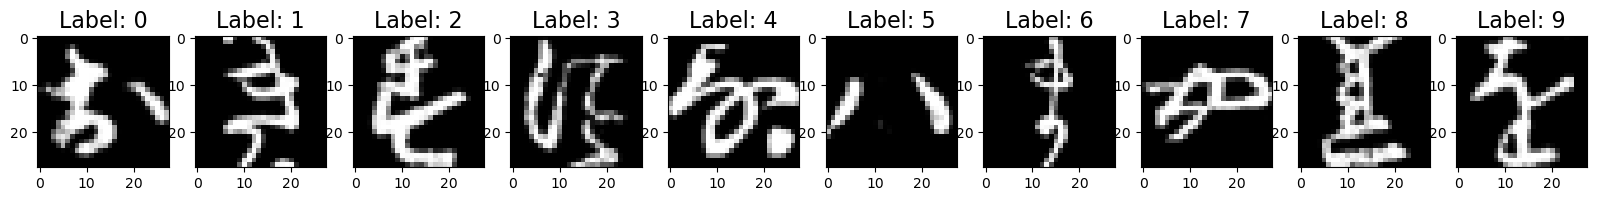

In [6]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

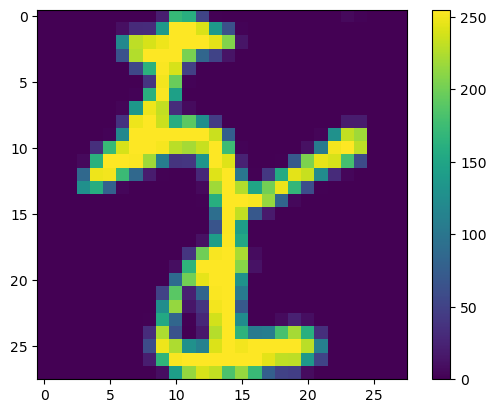

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

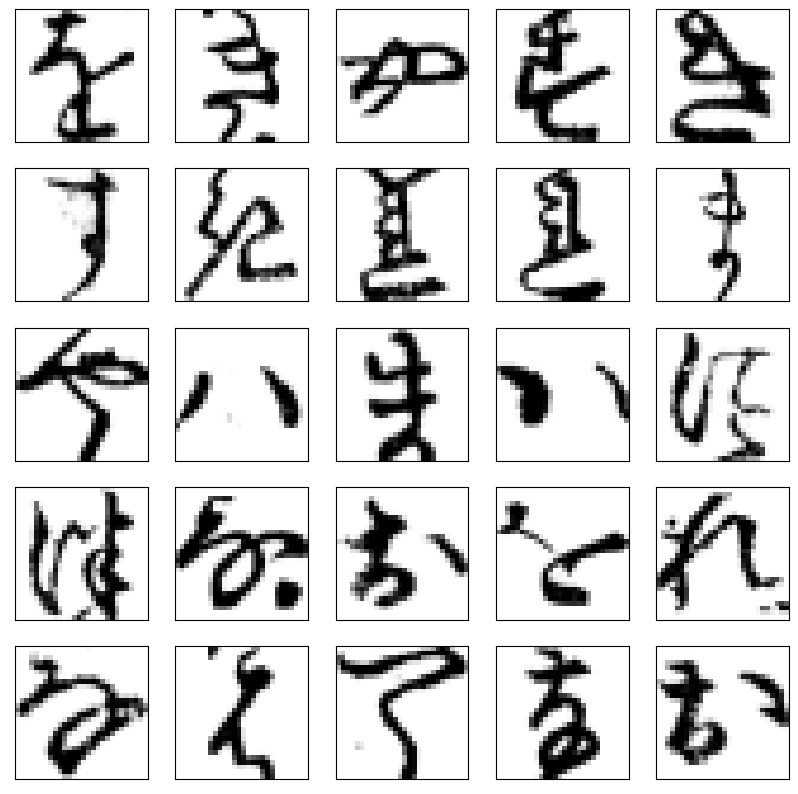

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [11]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 4s 17ms/step - loss: 0.7873 - accuracy: 0.7608
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.3713 - accuracy: 0.8881
Epoch 3/10
118/118 [==============================] - 2s 16ms/step - loss: 0.2794 - accuracy: 0.9162
Epoch 4/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2289 - accuracy: 0.9329
Epoch 5/10
118/118 [==============================] - 2s 18ms/step - loss: 0.1957 - accuracy: 0.9420
Epoch 6/10
118/118 [==============================] - 2s 18ms/step - loss: 0.1693 - accuracy: 0.9498
Epoch 7/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1463 - accuracy: 0.9564
Epoch 8/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1297 - accuracy: 0.9623
Epoch 9/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1122 - accuracy: 0.9670
Epoch 10/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1022 - accura

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 4ms/step - loss: 0.4088 - accuracy: 0.8851
Test Loss: 0.4088047444820404, Test Accuracy: 0.8851000070571899


In [16]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[[9.5519281e-05 2.8823297e-09 1.0833013e-08 ... 1.4401667e-07
  2.9815080e-06 1.2051834e-07]
 [7.1704586e-04 1.4704920e-04 8.8338088e-03 ... 1.1273605e-03
  5.0494759e-03 9.8058802e-01]
 [2.9685955e-02 9.9835852e-05 9.3312876e-04 ... 9.3870062e-01
  1.0140983e-02 3.7950249e-06]
 ...
 [7.9602618e-09 3.0267478e-07 1.2923814e-06 ... 2.6206174e-06
  9.9999213e-01 1.2138645e-06]
 [6.2171847e-04 2.3336023e-01 2.9392397e-02 ... 1.6184057e-04
  1.9776495e-03 1.9059561e-03]
 [1.3882368e-02 2.4230257e-03 9.8874988e-03 ... 8.4721166e-01
  2.8231790e-02 1.7122037e-03]]
[5 9 7 ... 8 5 7]


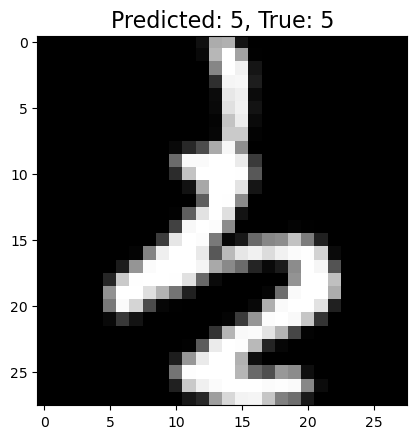

In [17]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

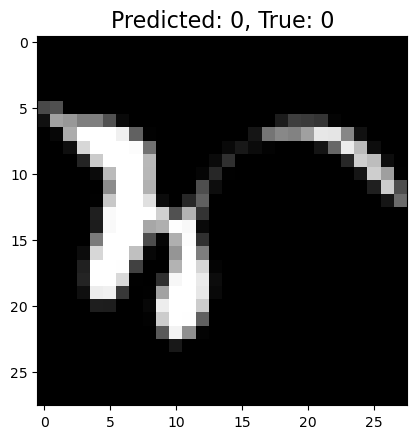

In [18]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

In [19]:
model.save('modelo/model.h5')
print('Model saved!')

Model saved!


In [2]:
import json 

In [5]:
from pymongo import MongoClient

In [23]:
myclient = MongoClient("mongodb://localhost:27017")
db = myclient["Grupo5"]

In [24]:
Collection = db["kmnist"] 
with open('kmnist2.ipynb') as file: 
    file_data = json.load(file)
if isinstance(file_data, list):
    Collection.insert_many(file_data)
else:
    Collection.insert_one(file_data)